In [14]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Final_Project\Log\training.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Final_Project\Data\Feature_selection\Filtered_Features.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [15]:
df.head()

,Unnamed: 0,Unnamed: 0.2,name,birth_date,birth_place,death_date,death_place,occupation,awards,alma_mater,education,spouse,children,occupation_cluster,birth_year,death_year,life_span,life_span_cluster,edu_award_cluster,bio_cluster
0,0,0,-0.291212,-0.327866,1.812300,0.087552,0.863551,-0.513085,-0.028915,-0.279288,-0.743137,0.472636,-0.408171,-0.628548,1643.0,1727.0,84.0,2.0,1.272170,0.101081
1,1,1,0.318741,1.533003,1.601048,1.914421,1.470586,-0.513085,0.391234,2.474455,0.171651,0.472636,-0.408171,-0.628548,1867.0,1934.0,67.0,2.0,-0.573778,-0.867573
2,2,2,-1.611324,-0.390376,1.503151,0.013399,1.563185,-0.513085,0.391234,-0.279288,0.171651,0.472636,2.971872,-0.628548,1879.0,1955.0,76.0,2.0,-0.573778,-0.867573
3,3,3,1.251097,1.508961,-1.304951,1.880715,1.131058,-0.513085,0.391234,-0.279288,0.171651,0.382327,3.464111,-0.628548,1815.0,1852.0,37.0,2.0,-0.573778,-0.867573
4,4,4,0.170609,1.316623,1.740165,1.563878,0.174206,-0.513085,0.391234,-0.279288,-4.069640,0.472636,-0.408171,-0.628548,1452.0,1519.0,67.0,5.0,1.272170,2.038390


# SKEWNESNI ANIQLASH 

In [16]:
# faqat raqamli ustunlar uchun
skewness = df.select_dtypes(include=['number']).skew()

# Natijani ko‘rish
print("📊 Skewness (egiklik) qiymatlari:\n")
print(skewness)


📊 Skewness (egiklik) qiymatlari:

Unnamed: 0             0.000000
Unnamed: 0.2           0.000000
name                  -0.031662
birth_date             0.221459
birth_place            0.179944
death_date             0.715997
death_place            0.965856
occupation             1.795307
awards                -2.587517
alma_mater             2.983751
education             -1.841190
spouse                -1.612245
children               2.461172
occupation_cluster     1.094339
birth_year            -3.049797
death_year            -2.995022
life_span             15.159016
life_span_cluster      2.874947
edu_award_cluster      1.155188
bio_cluster            0.671113
dtype: float64


| Ustun                        | Skewness qiymati | Tahlil                                                                              |
| ---------------------------- | ---------------- | ----------------------------------------------------------------------------------- |
| `Unnamed: 0`, `Unnamed: 0.2` | 0.000000         | Mutlaq simmetrik, hech qanday egiklik yo'q.                                         |
| `name`                       | -0.031662        | Deyarli simmetrik, taqsimot normalga yaqin.                                         |
| `birth_date`                 | 0.221459         | Past darajadagi musbat egiklik.                                                     |
| `birth_place`                | 0.179944         | Past darajadagi musbat egiklik.                                                     |
| `death_date`                 | 0.715997         | O'rtacha musbat egiklik.                                                            |
| `death_place`                | 0.965856         | O'rtacha musbat egiklikga yaqin.                                                    |
| `occupation`                 | 1.795307         | Kuchli musbat egiklik (taqsimot o'ngga cho'zilgan).                                 |
| `awards`                     | -2.587517        | Kuchli manfiy egiklik (taqsimot chapga cho'zilgan).                                 |
| `alma_mater`                 | 2.983751         | Juda kuchli musbat egiklik.                                                         |
| `education`                  | -1.841190        | Kuchli manfiy egiklik.                                                              |
| `spouse`                     | -1.612245        | Kuchli manfiy egiklik.                                                              |
| `children`                   | 2.461172         | Kuchli musbat egiklik.                                                              |
| `occupation_cluster`         | 1.094339         | Kuchli musbat egiklik.                                                              |
| `birth_year`                 | -3.049797        | Juda kuchli manfiy egiklik.                                                         |
| `death_year`                 | -2.995022        | Juda kuchli manfiy egiklik.                                                         |
| `life_span`                  | 15.159016        | Juda juda kuchli musbat egiklik (chunki bu ustun ehtimol o'ngga keskin cho'zilgan). |
| `life_span_cluster`          | 2.874947         | Juda kuchli musbat egiklik.                                                         |
| `edu_award_cluster`          | 1.155188         | Kuchli musbat egiklik.                                                              |
| `bio_cluster`                | 0.671113         | O'rtacha musbat egiklik.                                                            |


# Log transform faqat musbat qiymatlar uchun 

In [ ]:
import numpy as np
df['life_span_log'] = np.log1p(df['life_span']) 

# Box -Cox transform

In [18]:
from scipy.stats import boxcox
df['life_span_boxcox'], fitted_lambda = boxcox(df['life_span'] + 1)  
print(f"Optimal lambda for Box-Cox: {fitted_lambda}")


Optimal lambda for Box-Cox: 0.32628236480256345


In [20]:
from scipy.stats import boxcox
import numpy as np

skewed_cols = ['life_span', 'birth_year', 'death_year', 'alma_mater', 'children']  # misol uchun

for col in skewed_cols:
    min_val = df[col].min()
    if min_val <= 0:
        # Minimal qiymatni musbatga ko'chirish uchun
        shifted = df[col] + abs(min_val) + 1
        df[col+'_boxcox'], _ = boxcox(shifted)
    else:
        df[col+'_boxcox'], _ = boxcox(df[col])


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# X va y ajratamiz
X = df.drop('life_span', axis=1)
y = df['life_span']

# Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  

# Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Baholash
y_pred = rf.predict(X_val)
print("📊 Random Forest Validation R2:", r2_score(y_val, y_pred))
print("📉 Validation MSE:", mean_squared_error(y_val, y_pred))


📊 Random Forest Validation R2: 0.9165592009861138
📉 Validation MSE: 167.6321619367435


In [22]:
from sklearn.tree import DecisionTreeRegressor

# Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Baholash
y_pred_dt = dt.predict(X_val)
print("📊 Decision Tree Validation R2:", r2_score(y_val, y_pred_dt))
print("📉 Validation MSE:", mean_squared_error(y_val, y_pred_dt))


📊 Decision Tree Validation R2: 0.999939777030668
📉 Validation MSE: 0.12098765432098765


In [25]:
from xgboost import XGBRegressor

# Model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Baholash
y_pred_xgb = xgb.predict(X_val)
print("📊 XGBoost Validation R2:", r2_score(y_val, y_pred_xgb))
print("📉 Validation MSE:", mean_squared_error(y_val, y_pred_xgb))


📊 XGBoost Validation R2: 0.9994325559100786
📉 Validation MSE: 1.139992434107966


In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_val)
print("📊 Linear Regression Validation R2:", r2_score(y_val, y_pred_lr))
print("📉 Validation MSE:", mean_squared_error(y_val, y_pred_lr))


📊 Linear Regression Validation R2: -0.003267307191419544
📉 Validation MSE: 2015.5591712030966


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go

# 1. X va y
X = df.drop('life_span', axis=1)
y = df['life_span']

# 2. Train, validation, test bo'lish
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# 3. Modellar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    r2 = r2_score(y_val, preds)
    mse = mean_squared_error(y_val, preds)
    results.append({'Model': name, 'R2 Score': r2, 'MSE': mse})

# 4. Natijalarni DataFrame ga yig'ish
results_df = pd.DataFrame(results)

# 5. Eng yaxshi R2 topish
best_model_index = results_df['R2 Score'].idxmax()

# 6. Jadvalni chizish (qizil bilan eng yaxshisi)
colors = ['lightgray'] * len(results_df)
colors[best_model_index] = 'crimson'  # eng yaxshi R2 uchun qizil rang

fig = go.Figure(data=[go.Table(
    header=dict(values=list(results_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[results_df[col] for col in results_df.columns],
               fill_color=[colors, colors, colors],
               align='left'))
])

fig.update_layout(title='Model Natijalari: R2 Score va MSE')
fig.show()

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Model
dt = DecisionTreeRegressor(random_state=42)

# R2 Score bo‘yicha 5-fold cross-validation
r2_scores = cross_val_score(dt, X, y, cv=5, scoring='r2')
print("📊 R2 (5-fold):", r2_scores)
print("📈 R2 O'rtacha:", np.mean(r2_scores))

# Cross-val prediction orqali MSE hisoblash
y_pred_cv = cross_val_predict(dt, X, y, cv=5)
mse = mean_squared_error(y, y_pred_cv)
print("📉 Cross-Validated MSE:", mse)


📊 R2 (5-fold): [0.99999762 0.92447817 0.98060882 0.9998322  0.99995797]
📈 R2 O'rtacha: 0.9809749580528285
📉 Cross-Validated MSE: 39.89418411706064


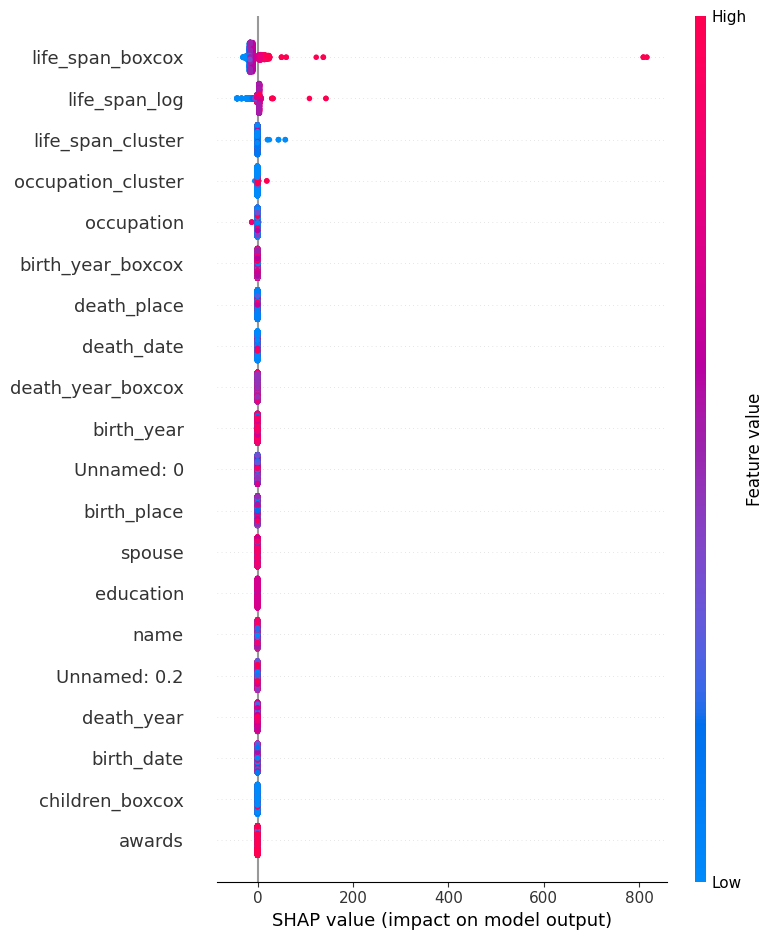

In [32]:
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Modelni o'qitamiz (cross_val uchun emas, alohida fit qilamiz)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X, y)

# SHAP explainer yaratamiz
explainer = shap.Explainer(dt_model, X)
shap_values = explainer(X)

# Summary plot (eng muhim xususiyatlarni ko‘rsatadi)
shap.summary_plot(shap_values, X)
